In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('ThoracicSurgery.csv')
data

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63,0
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61,0
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52,0
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [ ]:
data.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [ ]:
data.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr', 'Fault'],
      dtype='object')


--- Distribution of FVC and FEV1 ---


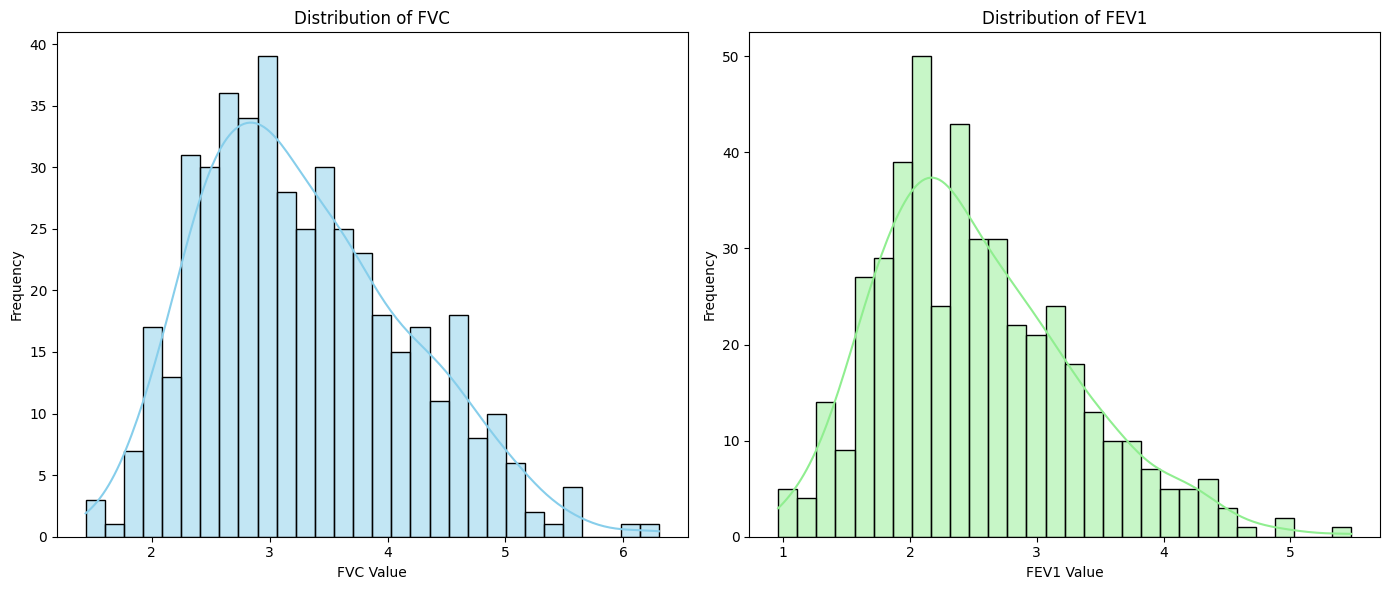

In [ ]:
print("\n--- Distribution of FVC and FEV1 ---")
plt.figure(figsize=(14, 6))

# Distribution of FVC
plt.subplot(1, 2, 1)
sns.histplot(data['FVC'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of FVC")
plt.xlabel("FVC Value")
plt.ylabel("Frequency")

# Distribution of FEV1
plt.subplot(1, 2, 2)
sns.histplot(data['FEV1'], kde=True, bins=30, color='lightgreen')
plt.title("Distribution of FEV1")
plt.xlabel("FEV1 Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


--- Failure Rate Distribution ---


<ipython-input-35-c9474214ea9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fault', data=data, palette='Set1')


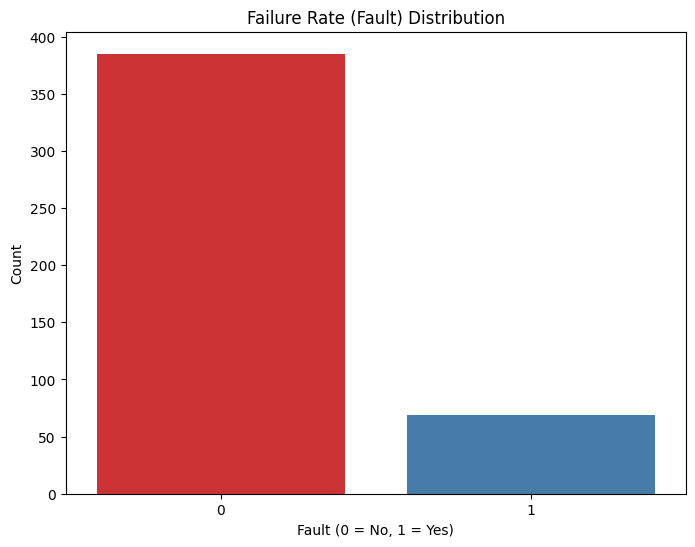

In [ ]:
# Failure Rate Analysis
print("\n--- Failure Rate Distribution ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Fault', data=data, palette='Set1')
plt.title("Failure Rate (Fault) Distribution")
plt.xlabel("Fault (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


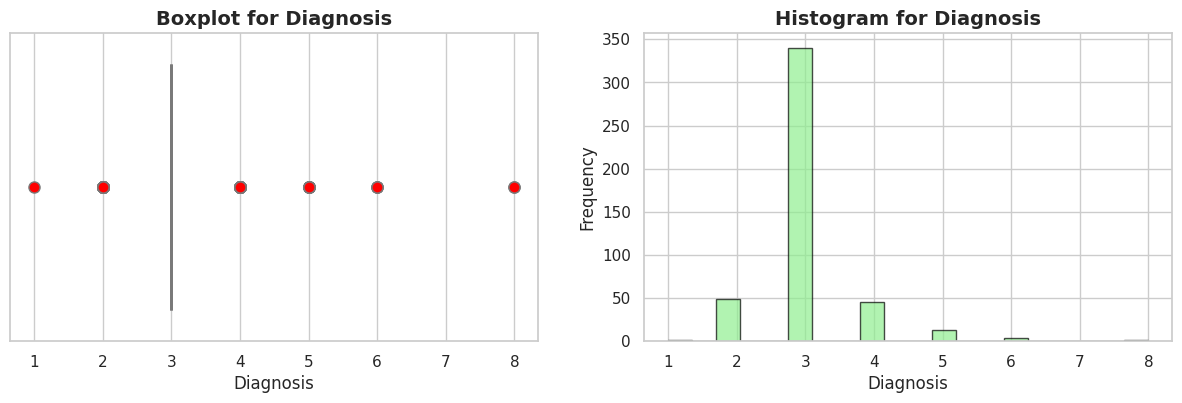

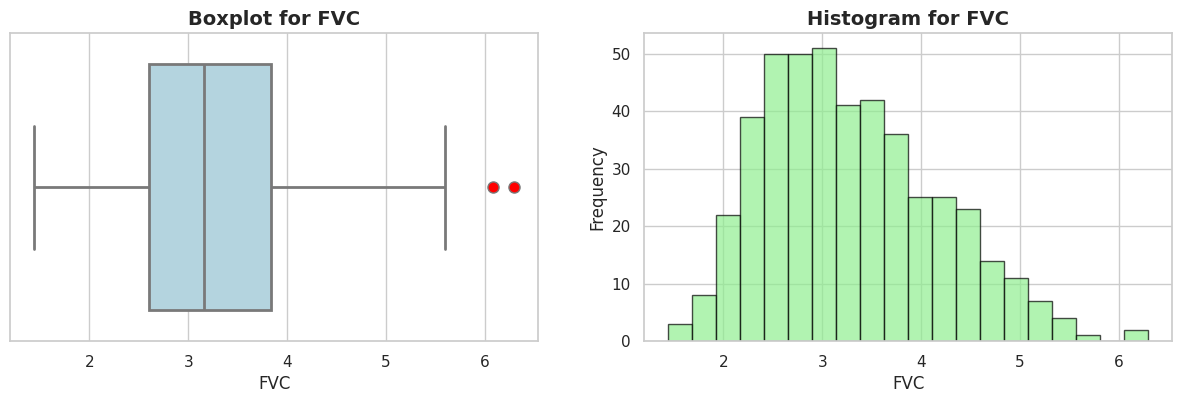

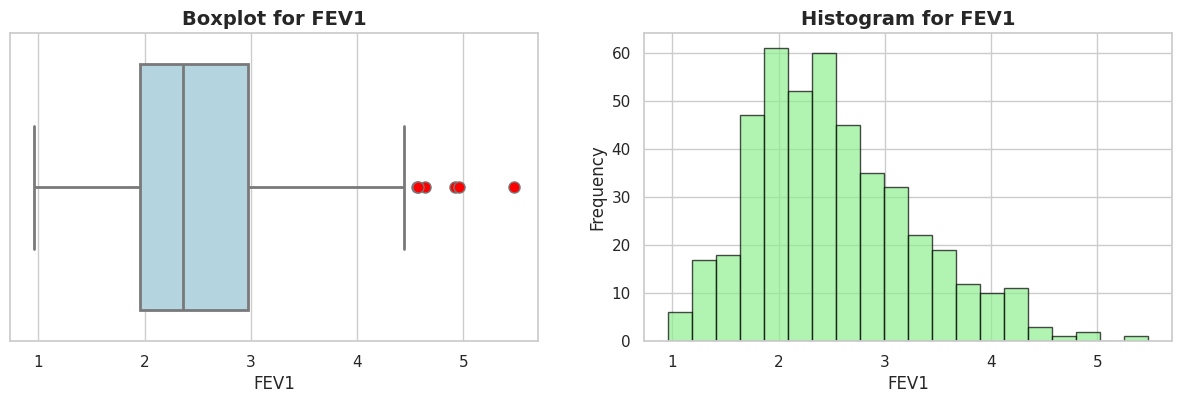

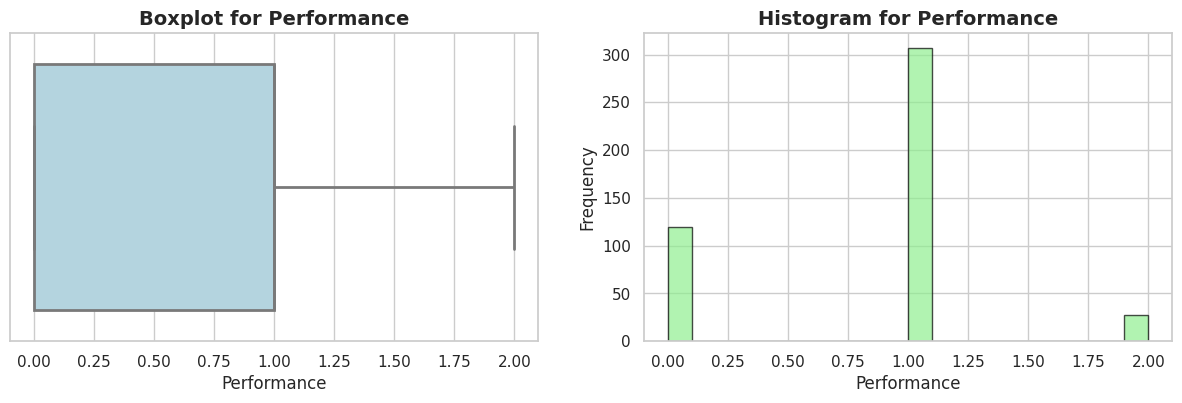

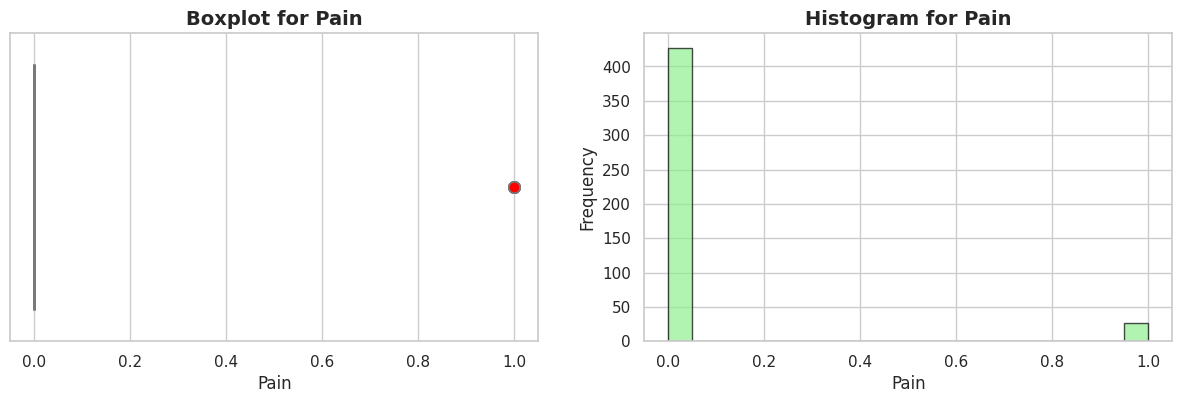

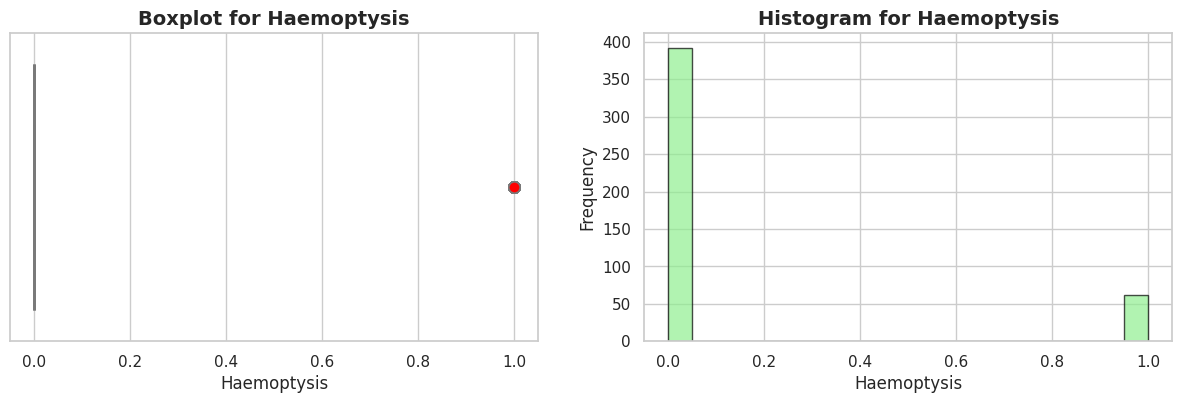

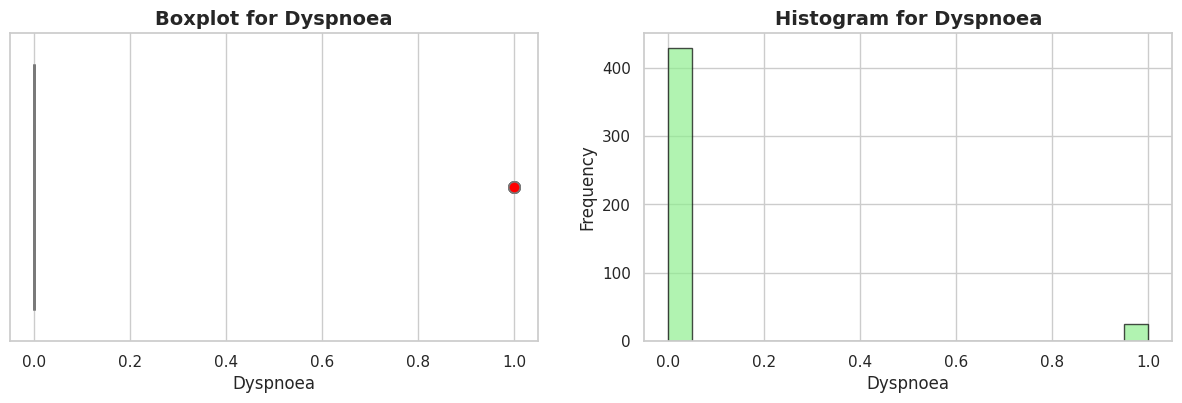

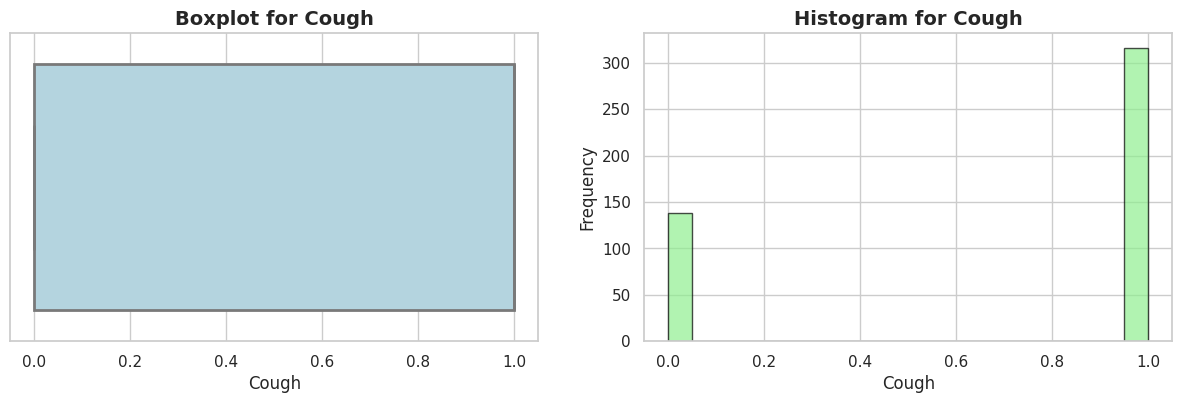

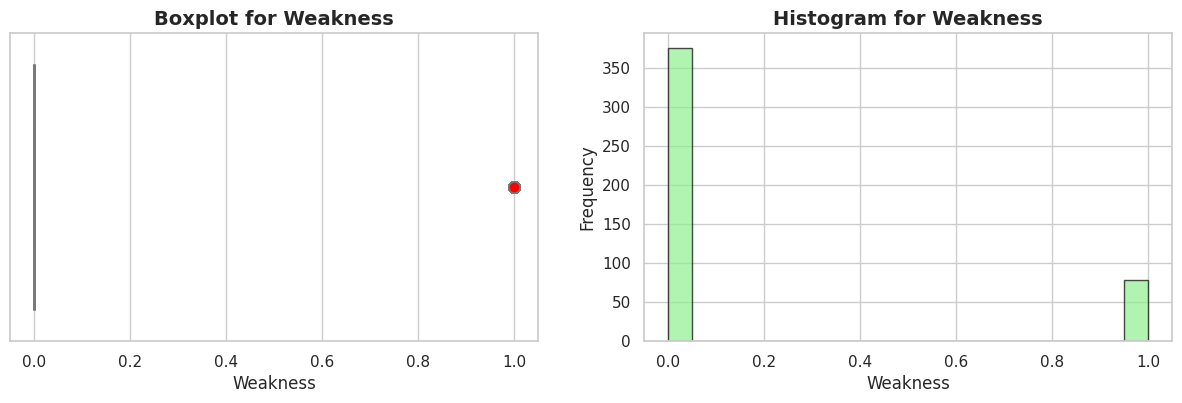

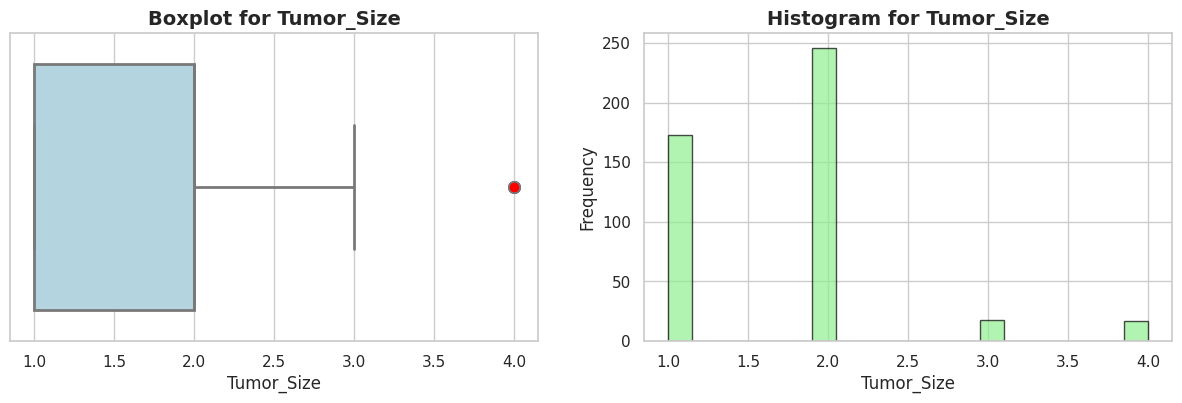

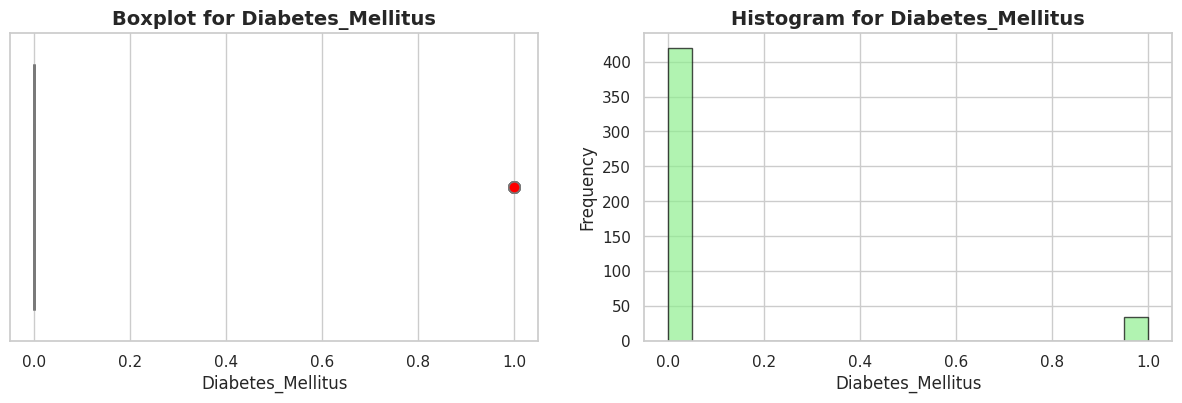

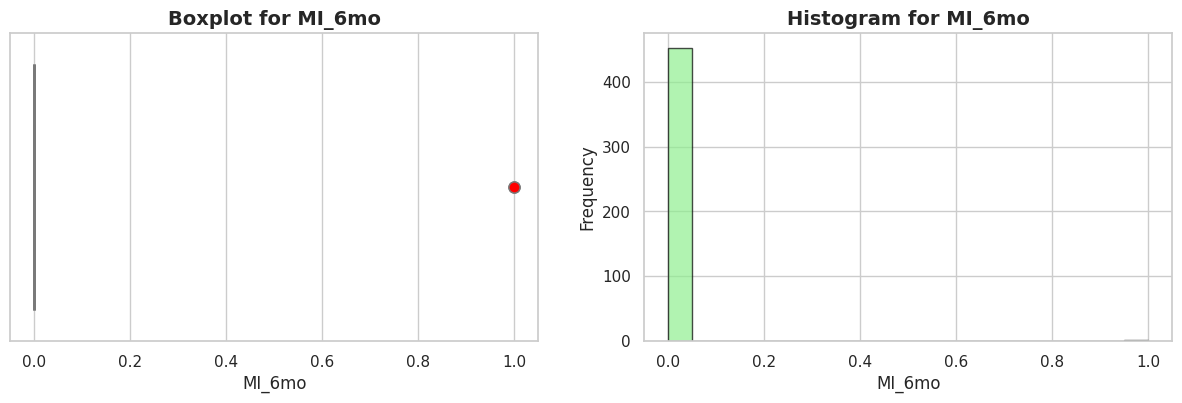

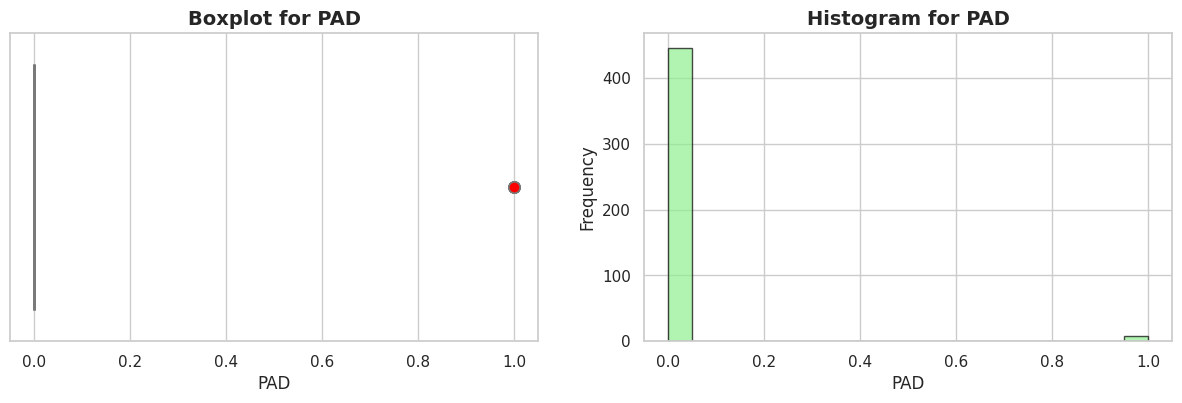

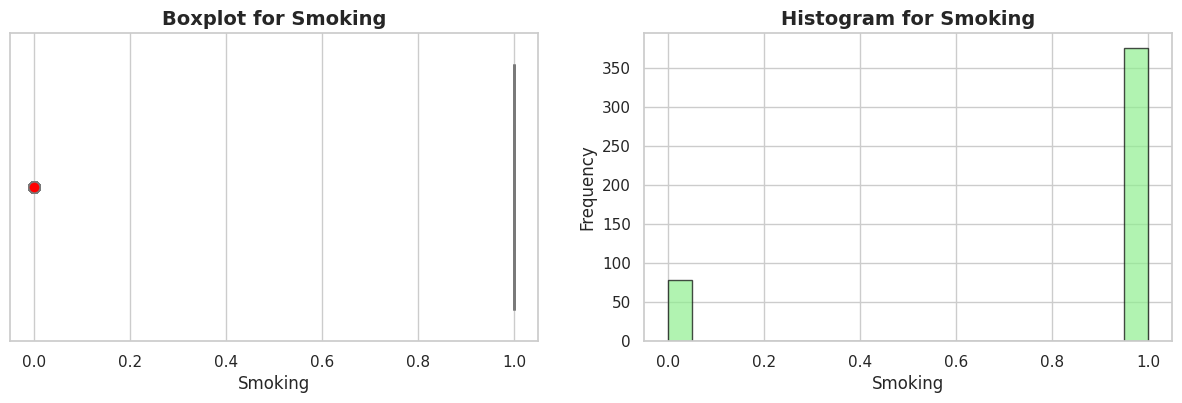

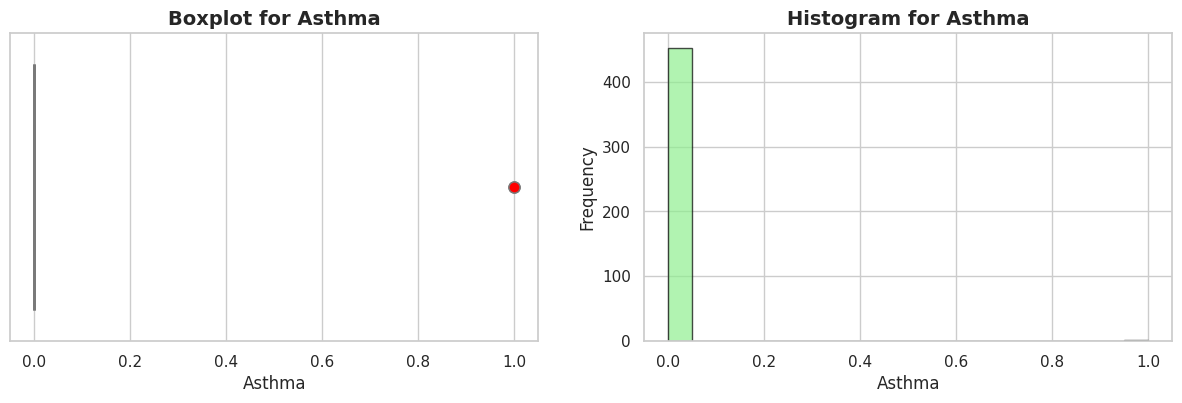

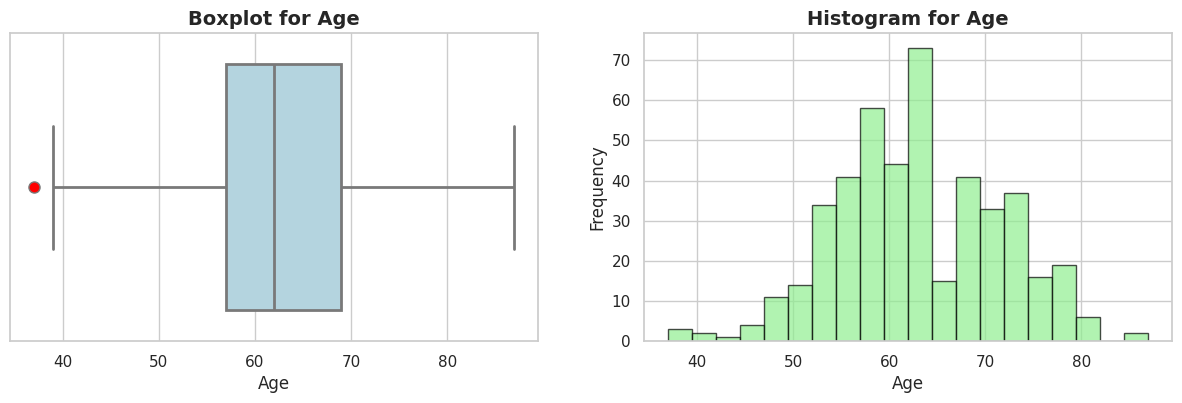

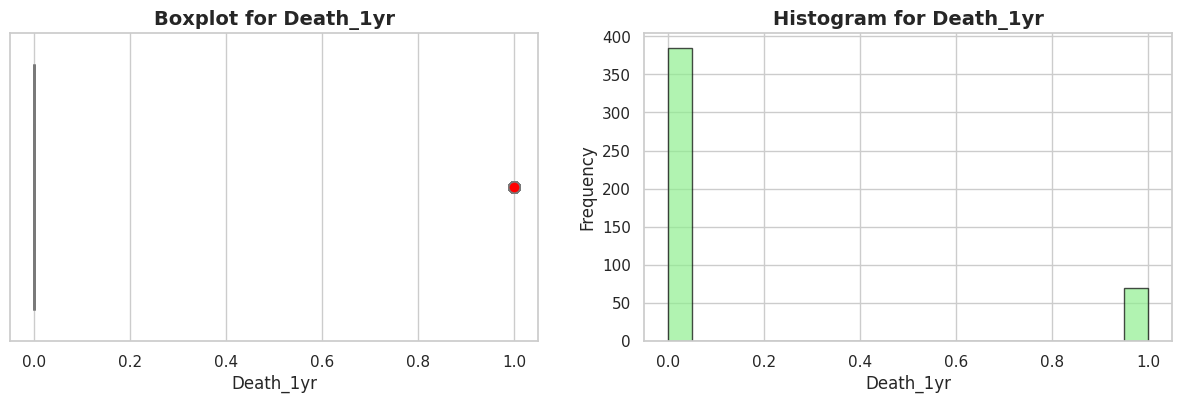

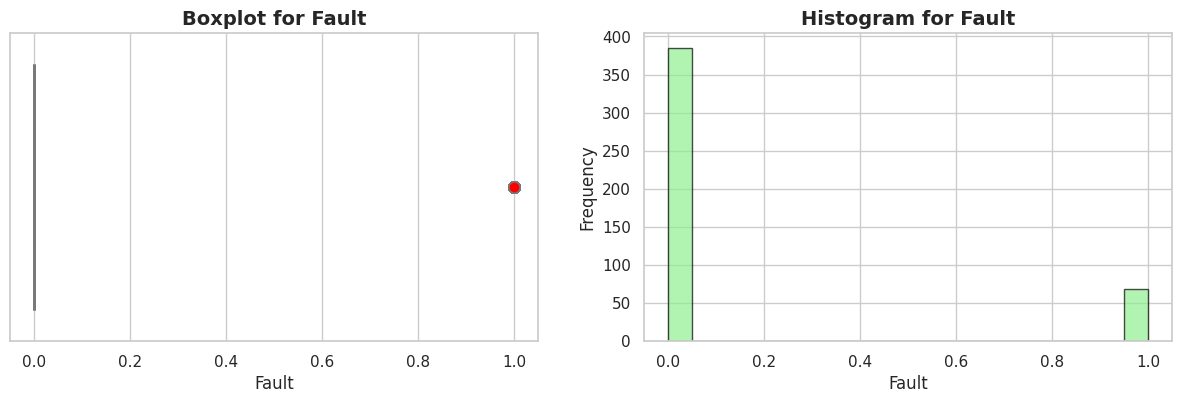

In [ ]:
# Set a style for the plots
sns.set(style="whitegrid")

# Loop through each feature (column) in the dataset
for columnName, columnData in data.items():  # Changed iteritems() to items()
    # Creating a figure for Boxplot and Histogram
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4))

    # Feature values
    x = columnData

    # Boxplot with Seaborn styling
    sns.boxplot(x=x, ax=ax1, color='lightblue', linewidth=2, fliersize=5,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    ax1.set_title(f'Boxplot for {columnName}', fontsize=14, fontweight='bold')
    ax1.set_xlabel(columnName, fontsize=12)

    # Histogram with colors
    ax2.hist(x, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax2.set_title(f'Histogram for {columnName}', fontsize=14, fontweight='bold')
    ax2.set_xlabel(columnName, fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)

    # Display the plots
    plt.show()


Using SUPPORT VECTOR MACHINE

In [ ]:
# Add 'Fault' column based on 'Death_1yr': 1 indicates a fault, 0 indicates no fault
data['Fault'] = data['Death_1yr']

# Separate features (X) and target (y)
X = data.drop(columns=['Death_1yr', 'Fault'])
y = data['Fault']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[76  0]
 [15  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In this code, we’re working to improve an SVM model by tuning its hyperparameters.Then we standardize the data with StandardScaler, which is important for SVM models to work optimally, then define a param_grid containing possible values for three key hyperparameters: C, kernel, and gamma. These parameters help control the SVM model’s complexity, type, and flexibility, which can improve its ability to generalize across both classes.

hjgvhUsing GridSearchCV, we find the best combination of these parameters through cross-validation. Finally,retraining the SVM model with the best parameters, make predictions, and evaluate its performance. The output includes the accuracy, confusion matrix, and classification report, helping you understand how well the model performs with these optimized settings.

In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with SVM and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Train the SVM model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.84
Confusion Matrix:
[[76  0]
 [15  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


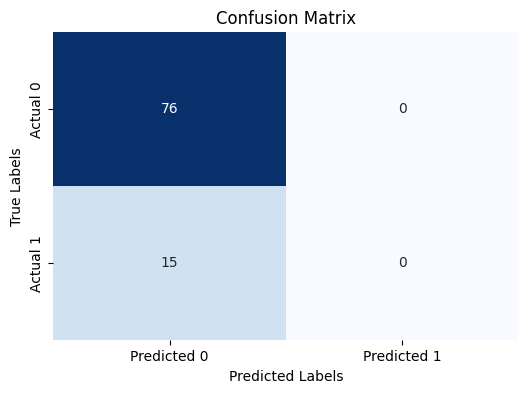

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Defining the true labels and predicted labels based on your confusion matrix
true_labels = [0] * 76 + [1] * 15
predicted_labels = [0] * 76 + [0] * 15  # Only class 0 predicted

# Calculating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Ploting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Using RANDOM FOREST CLASSIFICATION MODEL

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.84
Confusion Matrix:
[[76  0]
 [15  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


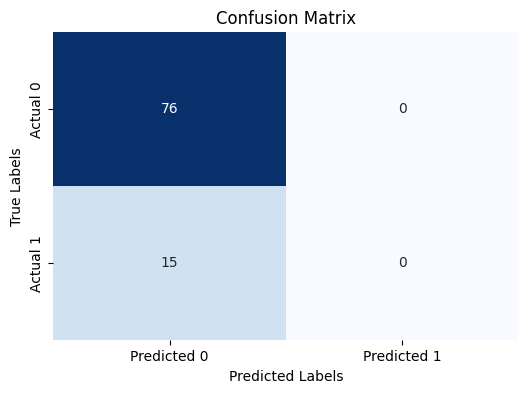

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Standardize the data (important for models like SVM, but not critical for Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],             # Maximum depth of trees
    'min_samples_split': [2, 5, 10],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples per leaf node
    'bootstrap': [True, False]                   # Whether to use bootstrap sampling
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Using DECISION TREESrffdffdfh

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
Accuracy: 0.84
Confusion Matrix:
[[76  0]
 [15  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        76
           1       0.00      0.00      0.00        15

    accuracy                           0.84        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.70      0.84      0.76        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


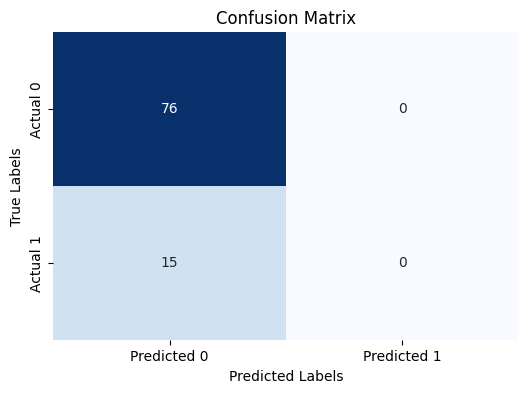

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [1, 2, 3],                  # Very shallow trees to reduce complexity
    'min_samples_split': [10, 20, 50],        # Limit splits to prevent overfitting
    'min_samples_leaf': [10, 20],             # Limit leaf nodes to reduce complexity
    'criterion': ['gini', 'entropy']         # Two common criteria for splitting nodes
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


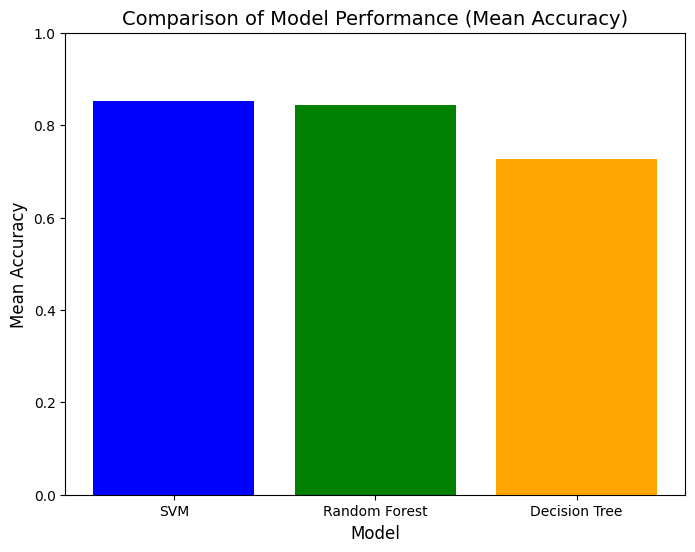

SVM Mean Accuracy: 0.85
Random Forest Mean Accuracy: 0.84
Decision Tree Mean Accuracy: 0.73


In [ ]:
# Standardize the data for SVM (not critical for Decision Trees or Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Create a dictionary of models
models = {'SVM': svm_model, 'Random Forest': rf_model, 'Decision Tree': dt_model}

# List to store mean accuracy scores
mean_accuracies = []

# Perform cross-validation to get mean accuracy for each model
for model_name, model in models.items():
    if model_name == 'SVM':
        # For SVM, use the scaled data
        accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        # For Random Forest and Decision Tree, no scaling needed
        accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracies.append(accuracy.mean())

# Plot the bar graph for comparison
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), mean_accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparison of Model Performance (Mean Accuracy)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.ylim([0, 1])  # Set y-axis limit from 0 to 1 (accuracy range)
plt.show()

# Print the mean accuracies for reference
for model_name, mean_acc in zip(models.keys(), mean_accuracies):
    print(f"{model_name} Mean Accuracy: {mean_acc:.2f}")


Clearly, from highest accuracy is of the Support Vector Model with the accuracy of 85%, and Random Forest, the second highest with 84% accuracy, and lastly Decision Tree with the least accuarcy of 73%